# Aggregating Data with Group by

Summary of topics

What you'll be able to do by the end.

## Theory 

Intro to concepts

## Sections

* [Group by a single column](#item1)
* [Group by multiple columns](#item2)
* [Group by units of time](#item3)

In [43]:
# Importing Python packages we are likely to need
import pandas as pd  # data tables
import matplotlib.pyplot as plt

### Load the data

In [ ]:
df = pd.read_csv("~/cf/coding_club/python_club/outputs/data/referrals_oct19_dec20.csv")
df['week_start'] = pd.to_datetime(df['week_start'])
df

<a name="item1">
<h2>Group by a single column</h2>
</a>

For this first section, we'll take a subset of the data which will be easier to work with. Select rows where `Specialty` column has value `2WW`.
* Use `==` to make a selection mask
* Use `df.loc` to select rows where the mask values are `True`

```python
smaller_df = df.loc[df['column'] == 'value', :]
```

In [69]:
df_2ww = df.loc[df['specialty'] == '2WW', :]
df_2ww

,week_start,ccg_code,specialty,priority,referrals
2,2019-10-07,00L,2WW,2 Week Wait,349
61,2019-10-07,00N,2WW,2 Week Wait,180
113,2019-10-07,00P,2WW,2 Week Wait,284
169,2019-10-07,00Q,2WW,2 Week Wait,122
226,2019-10-07,00R,2WW,2 Week Wait,170
...,...,...,...,...,...
592413,2020-12-21,99C,2WW,2 Week Wait,151
592463,2020-12-21,99E,2WW,2 Week Wait,208
592520,2020-12-21,99F,2WW,2 Week Wait,127
592574,2020-12-21,99G,2WW,2 Week Wait,113


### Sum 2WW referrals, for each CCG
* Use `df.groupby('ccg_code')`
* Select the `referrals` column
* Use the `sum` method

```python
gb = df.groupby('aggregation_column')
summed_values = gb['value_column'].sum()
```

The result of the aggregation operation (i.e. the sum) is a pandas `Series` object. The index comprises the CCG codes and the values are the summed referrals.

In [46]:
gb_ccg = df_2ww.groupby('ccg_code')
ref_per_ccg = gb_ccg['referrals'].sum()
ref_per_ccg

ccg_code
00L    18486
00N     7922
00P    14929
00Q     6695
00R     8156
       ...  
99C    11883
99E    15970
99F     9710
99G     9545
99M     9173
Name: referrals, Length: 135, dtype: int64

### Visualise referrals in each CCG with a bar chart
```python
fig, ax = plt.subplots()
ax.bar(df.index, df.values)
```

<BarContainer object of 135 artists>

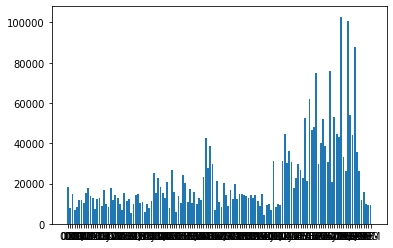

In [47]:
fig, ax = plt.subplots()
ax.bar(ref_per_ccg.index, ref_per_ccg.values)

### Take the average weekly referrals, for each CCG
Use the same `groupby` result you made previously, but this time use `mean` instead of `sum`.

```python
avg_values = gb['value_column'].mean()
```

In [54]:
mean_weekly_refs_per_ccg = gb_ccg['referrals'].mean()
mean_weekly_refs_per_ccg

ccg_code
00L    280.090909
00N    113.171429
00P    229.676923
00Q    101.439394
00R    127.437500
          ...    
99C    177.358209
99E    241.969697
99F    149.384615
99G    144.621212
99M    131.042857
Name: referrals, Length: 135, dtype: float64

### Other useful aggregate functions
* `count`
* `median`
* `std` (standard deviation)
* `sem` (standard error of the mean)
* `min` and `max`

You could also define your own aggregate functions. This flexibility is can be extremely powerful.


<a name="item2"><h2>Group by multiple columns</h2></a>

It's possible to group by multiple columns at once. This means you apply the aggregation function to each subset of values in the columns you group by. For example, if you group by `CCG` and `priority` then use the `sum` function, you will get the total number of referrals per CCG *and* per priority level.

    gb_multi_cols = df.groupby(['column_1', 'column_2'])

The result is still a pandas `Series` object, but this time the index has two 'levels', for `ccg_code` and `priority`.

Let's group by both `specialty` and `priority`, then take the sum.

In [64]:
# gb_ccg_priority = df.groupby(['specialty', 'priority'])
# ref_per_priority_per_ccg = gb_ccg_priority.sum()
# ref_per_priority_per_ccg


referrals
specialty          priority              
(blank)            2 Week Wait        438
                   Routine          81278
                   Urgent           13202
2WW                2 Week Wait    2924070
                   Routine           2281
...                                   ...
Surgery - Vascular Routine         126613
                   Urgent           36828
Urology            2 Week Wait        158
                   Routine         417394
                   Urgent           86950

[146 rows x 1 columns]

<a name="item3"><h2>Group by units of time</h1></a>

You can group by `datetime` values, just like anything else. But sometimes the units of time might be too granular to be useful, e.g. your `datetime` values may be expressed at the level of minutes or seconds, but if your data span a year then you probably don't want to show each individual data point.

Pandas has a special date `Grouper` object, which you provide to `df.groupby`. Its `key` argument lets you specify the column you want to group by and the `freq` argument specifies the desired frequency, where
* `D` means daily
* `W` means weekly
* `M` means monthly

The full list of frequency options can be found <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases">here</a>.

    gb_daily = df.groupby(pd.Grouper(key='column_name', freq='D'))

Find the total number of referrals by month and then plot the resulting time series. What happened in March 2020?

In [66]:
gb_monthly = df.groupby(pd.Grouper(key='week_start', freq='M'))
ref_monthly = gb_monthly['referrals'].sum()
ref_monthly

week_start
2019-10-31    1435744
2019-11-30    1407937
2019-12-31    1383517
2020-01-31    1448056
2020-02-29    1442748
2020-03-31    1152563
2020-04-30     267082
2020-05-31     478250
2020-06-30     959430
2020-07-31     963644
2020-08-31    1245864
2020-09-30    1128657
2020-10-31    1149103
2020-11-30    1399462
2020-12-31     756241
Freq: M, Name: referrals, dtype: int64

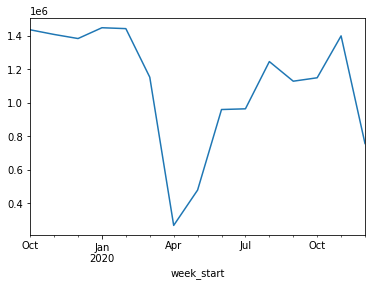

In [68]:
ref_monthly.plot()

In [ ]:
# TODO could save dataset/plots if wanted